Zadatak: Detekcija godina i pola na osnovu fotografije koriscenjem dubokog ucenja

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Nakon ucitavanja pocetnog dataseta sledi transformacija istog

In [ ]:
!unzip -q /content/gdrive/MyDrive/Prezentacija/#7.zip

replace wiki_crop/00/10049200_1891-09-16_1958.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Ucitavanje .mat file-a kao i importovanje potrebnih dependencies-a

In [ ]:
import numpy as np

In [ ]:
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

In [ ]:
wikiMat = '/content/wiki_crop/wiki.mat'
wikiMatData =loadmat(wikiMat)

In [ ]:
columns = ['age', 'gender', 'path', 'face_score1', 'face_score2']
wiki = wikiMatData['wiki']
#print(len(wiki[0][0][7][0]))

In [ ]:
#print(wiki)
wikiPhotoDate = wiki[0][0][1][0] 


In [ ]:
wikiPath = wiki[0][0][2][0]
wikiGender= wiki[0][0][3][0]
wikiFaceScore1=wiki [0][0][6][0]
wikiFaceScore2 = wiki[0][0][7][0]

print(wikiPath);
print(wikiGender);
print(wikiFaceScore1);
print(wikiFaceScore2);
print (len(wikiPath))

[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31')
 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31')
 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29') ...
 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30')
 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30')
 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]
[1. 1. 1. ... 1. 1. 0.]
[4.30096239 2.6456395  4.32932883 ... 3.49430317       -inf 5.48691655]
[       nan 1.94924791        nan ...        nan        nan        nan]
62328


In [ ]:
wikiPath2 = []
for p in wikiPath:
  wikiPath2.append('wiki_crop/' + p[0])
print(len(wikiPath2))
wikiGenders = []

for n in range(len(wikiGender)):
  if wikiGender[n] == 1:
    wikiGenders.append('Male')
  else: wikiGenders.append('Female')

wikiBirthDate = []

62328


In [ ]:
for n in wikiPath2:
  wikiBirthDate.append(n.split('_')[2])
print(len(wikiBirthDate))
wikiAge = []
#wikiPhotoDateArr= np.array(wikiPhotoDate).resize(1121904)

q= len(wikiBirthDate)
print(q)
for i in range(len(wikiBirthDate)):
  try:
    d1 = date.datetime.strptime(wikiBirthDate[i][0:10], '%Y-%m-%d') #Datum rodjenja string to Date
    d2 = date.datetime.strptime(str(wikiPhotoDate[i]), '%Y') #Datum nastanka fotografije
    reldel= relativedelta(d2,d1)
    difference= reldel.years
  except Exception as err:
        print(err)
        difference = -1
  wikiAge.append(difference)



62328
62328
time data '829-09-08' does not match format '%Y-%m-%d'
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-00' does not match format '%Y-%m-%d'
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-02-00' does not match format '%Y-%m-%d'


In [ ]:
#Koritimo vstack metodu kako bi spojili nizove
wikiArray= np.vstack((wikiAge, wikiGenders, wikiPath2, wikiFaceScore1, wikiFaceScore2)).T
wikiDF= pd.DataFrame(wikiArray)

In [ ]:
wikiDF.columns=columns
wikiDF = wikiDF[wikiDF['face_score1'] != '-inf']
wikiDF = wikiDF[wikiDF['face_score2'] == 'nan']

In [ ]:
wikiDF = wikiDF.drop(['face_score1', 'face_score2'], axis = 1)
wikiDF.to_csv('wiki.csv', index= False)

Kada je .mat file obradjen i pretvoren u klasican csv nastavlja se sa ciscenjem dataseta

In [ ]:
data= pd.read_csv('wiki.csv')

In [ ]:
data.head()

,age,gender,path
0,27,Male,wiki_crop/17/10000217_1981-05-05_2009.jpg
1,59,Male,wiki_crop/12/100012_1948-07-03_2008.jpg
2,40,Female,wiki_crop/16/10002116_1971-05-31_2012.jpg
3,51,Female,wiki_crop/02/10002702_1960-11-09_2012.jpg
4,33,Male,wiki_crop/41/10003541_1937-09-27_1971.jpg


29727
10489


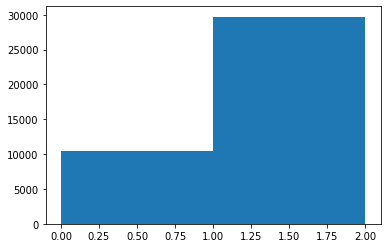

In [ ]:
#Ispitivanje dataseta
import matplotlib.pyplot as pyplt

gender=[]
for g in data['gender'].values:
  if g=='Male':
    gender.append(1)
  else:
    gender.append(0)

pyplt.hist(gender,range(3))
print(sum(gender))
print(len(gender)- sum(gender))
pyplt.show()

U datasetu postoji znatno vise muskaraca nego zena

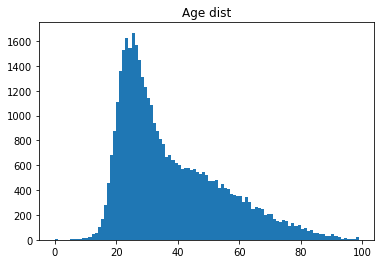

In [ ]:
pyplt.hist(data['age'],range(100))
pyplt.title("Age dist")
pyplt.show()

Priprema test i train vrednosti za detekciju godina

In [ ]:
import cv2 
import os 
from sklearn.model_selection import train_test_split

data= pd.read_csv('wiki.csv')
data= data.drop(['gender'], axis=1)

data = data[data['age'] >=0]
data = data[data['age'] <=100]

data = data.values

D_train, D_test= train_test_split(data, test_size = 0.2, random_state=13)

for i in range(102):
  output_dir_train_male = 'dataset/age/train/' + str(i)
  output_dir_train_female = 'dataset/age/train/' + str(i)

  if not os.path.exists(output_dir_train_male):
      os.makedirs(output_dir_train_male)

  if not os.path.exists(output_dir_train_female):
      os.makedirs(output_dir_train_female)

  output_dir_test_male = 'dataset/age/test/' + str(i)
  output_dir_test_female = 'dataset/age/test/' + str(i)

  if not os.path.exists(output_dir_test_male):
      os.makedirs(output_dir_test_male)

  if not os.path.exists(output_dir_test_female):
      os.makedirs(output_dir_test_female)

i = 0

for image in D_train:
  img = cv2.imread(image[1],1)
  img = cv2.resize(img, (128,128))
  cv2.imwrite('dataset/age/train' + str(image[0]) + '/' + str(i) + '.jpg', img)
  print(str(i))
  i += 1

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(i) + '.jpg', img)
    print(str(i))
    i += 1

Streaming output truncated to the last 5000 lines.
35159
35160
35161
35162
35163
35164
35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
3

In [ ]:
#Priprema dataseta za detekciju pola

data= pd.read_csv('wiki.csv')
data= data.drop(['age'], axis=1)
D_train, D_test= train_test_split(data, test_size = 0.2, random_state=13) 
#Izdvajanje broja po polu i odredjivanje da trening skup koristi isti broj muskih i zenskih lica
D_train_male = D_train[D_train['gender'] == 'Male']
D_train_female = D_train[D_train['gender'] == 'Female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:] 
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

#Namestanje potrebnih foldera
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

#rasporedjivanje slika po skupovima
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'Male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'Male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print(str(counter))
    counter += 1

Streaming output truncated to the last 5000 lines.
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
1

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 1.7 MB/s 


In [ ]:
#Model za detekciju pola
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

model.add(mobile)
model.add(Dense(units=2,activation="softmax"))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb64b5b9a50>>


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#ImageDataGenerator je klasa koja modifikuje slike tokom treniranja

train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Ucitavanje train i test skupova
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#Treniranje modela
GenModel = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)

Found 16838 images belonging to 2 classes.
Found 23378 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 110s 6s/step - loss: 0.6007 - accuracy: 0.7836 - val_loss: 0.9133 - val_accuracy: 0.6528
Epoch 2/10
20/20 [==============================] - 108s 5s/step - loss: 0.5656 - accuracy: 0.7930 - val_loss: 0.7793 - val_accuracy: 0.7034
Epoch 3/10
20/20 [==============================] - 107s 5s/step - loss: 0.5436 - accuracy: 0.8039 - val_loss: 0.7621 - val_accuracy: 0.6988
Epoch 4/10
20/20 [==============================] - 107s 5s/step - loss: 0.5472 - accuracy: 0.7977 - val_loss: 0.8679 - val_accuracy: 0.6556
Epoch 5/10
20/20 [==============================] - 107s 5s/step - loss: 0.5871 - accuracy: 0.7805 - val_loss: 0.8513 - val_accuracy: 0.6737
Epoch 6/10
20/20 [==============================] - 106s 5s/step - loss: 0.5765 - accuracy: 0.7891 - val_loss: 0.8774 - val_accuracy: 0.6647
Epoch 7/10
20/20 [==============================] - 106s 5s/step - loss: 0.5046 - accuracy: 0.8062 - val_loss: 0.8987 - val_accuracy: 0.6547
Epoch 8/10
20

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


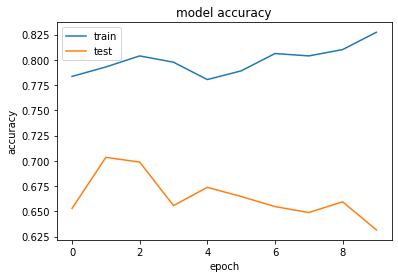

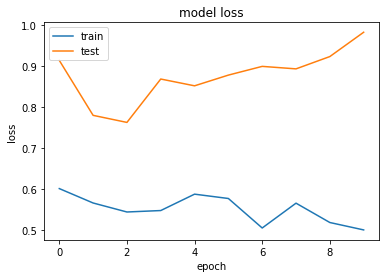

In [ ]:
model.save('weights/gender.h5')
#Preciznost i loss vizualizovano
import matplotlib.pyplot as plt

plt.plot(GenModel.history['accuracy'])
plt.plot(GenModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(GenModel.history['loss'])
plt.plot(GenModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

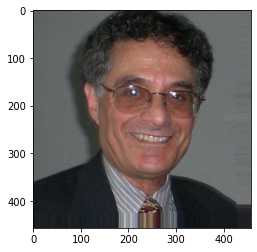

Male


In [ ]:
#Test

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/wiki_crop/12/100012_1948-07-03_2008.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]>gender_pred[0][1]:
  print('Female')
else:
  print('Male')

Model za godine


In [ ]:
#Implementiran isto kao i model za pol

model2 = Sequential()
mobile = MobileNetV2(include_top=False,
                          weights="imagenet", 
                          input_shape=(128,128,3),
                          pooling="max")

model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))


model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

print(model2.summary())
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

AgeModel = model2.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)


model2.save('weights/age.h5')

In [ ]:
import matplotlib.pyplot as plt

plt.plot(AgeModel.history['accuracy'])
plt.plot(AgeModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(AgeModel.history['loss'])
plt.plot(AgeModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/wiki_crop/17/10000217_1981-05-05_2009.jpg' 
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)                        
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

if temp==0:
  print('0-24 yrs old')
if temp==1:
  print('25-49 yrs old')
if temp==2:
  print('50-74 yrs old')
if temp==3:
  print('75-99 yrs old')
if temp==4:
  print('91-101 yrs old')